In [1]:
import QDYN
import matplotlib.gridspec as gridspec
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from collections import OrderedDict
from glob import glob
from os.path import join

In [25]:
from src.notebook_plots_v1 import plot_convergence_comparison, plot_rho_prop_error_comparison, combine_noise_tables, collect_noise_table

In [3]:
def rf_sort_key(rf):
    """Key for sorting runfolder according to number of trajectories"""
    try:
        a, b = rf.split('_ntrajs')
        return (a, int(b))
    except ValueError:
        return (rf, 0)

## How does convergence compare between density matrix optimization and independent-trajectory optimization?

the following compares the *optimization* J_T. Values for density matrix and trajectory optimization are not directly comparable

In [4]:
ROOT = './data/method_comparison_dicke_large_lambda/'

In [5]:
rfs_independent_trajs =  sorted(
    glob(join(ROOT, 'T5_independent_ntrajs*')), key=rf_sort_key)

In [6]:
rf_rho = join(ROOT, 'T5_rho_ntrajs1')

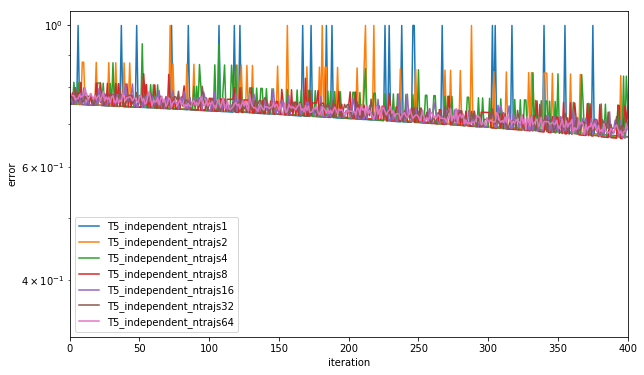

In [7]:
plot_convergence_comparison(
    rfs_independent_trajs, monotonic=False, xlim=(0, 400))

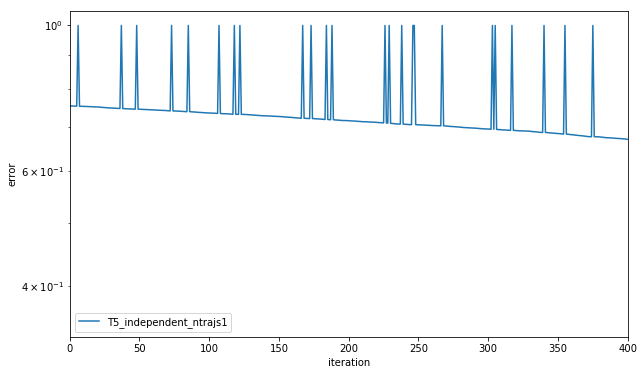

In [8]:
plot_convergence_comparison(
    rfs_independent_trajs[0:1], monotonic=False, xlim=(0, 400))

The rapid jiggling is the result of the quantum jumps: If a jump happens in a trajectory, that trajectory will contribute a zero to the fidelity. The good thing (and the non-obvious result of the paper), is while there is no monotonic convergence, there is still convergence on average, which this plot illustrates. The local minimum (e.g. at 260 for 1 traj) is because there are two competing aspects: getting to the target states (when we're lucky and there are no jumps), and minimizing dissipation (= jumps)

The same plot, but throwing out points that would violate monotonic convergence:

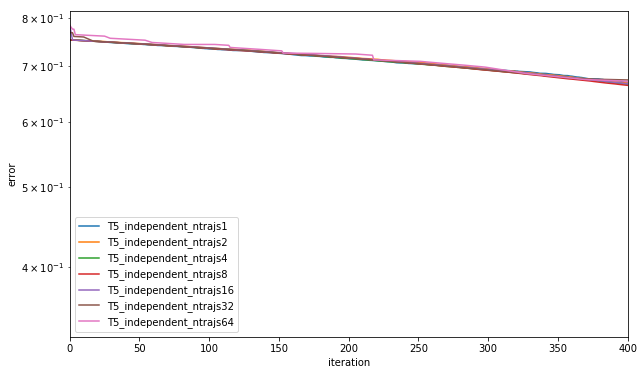

In [9]:
plot_convergence_comparison(
    rfs_independent_trajs, monotonic=True, xlim=(0, 400))

The following is a plot of the actual success, as $1 - <P_{target}>$, where $P_{target}$ is the projector onto the target states. This was calculated by taking the optimized pulses at each iteration, and re-running it for the full density matrix (which is easy because this is just two nodes, i.e. the Hilbert space is small). Thus, the result is exact, and it is comparable between different methods / optimization functionals, unlike the value of the optimization functional directly, shown above.

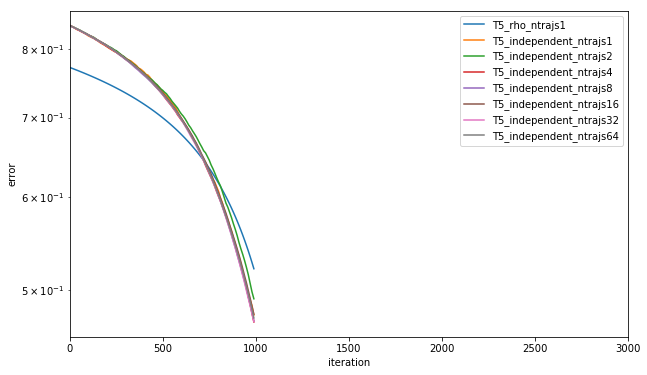

In [10]:
plot_rho_prop_error_comparison(
    [rf_rho, ] + rfs_independent_trajs, xlim=(0, 3000))

This shows that
* individual trajectories don't quite match the convergence of the full density matrix, but they get pretty close
* the number of trajectories has almost no influence on the convergence/obtained error

For the paper, it would probably be instructive to have the above figure (`In 11`), with the value for the optimization functional (`In 9`) as an inset.

## How do the pulses compare between density matrix optimization and independent-trajectory optimization?

In [11]:
from src.notebook_plots_v1 import render_pulses, plot_pulse_comparison, plot_pulse_delta_smoothing, collect_noise_table

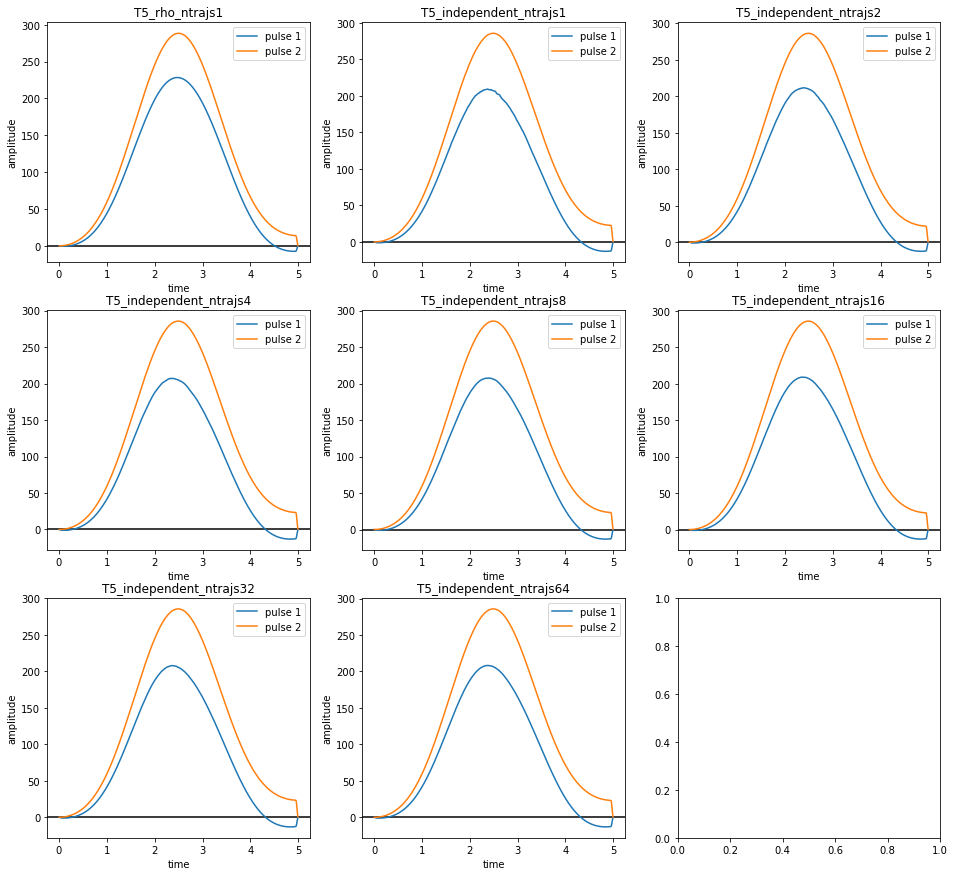

In [12]:
plot_pulse_comparison([rf_rho, ] + rfs_independent_trajs)

In [15]:
from src.pulse_smoothing_v1 import smooth_pulse_savgol

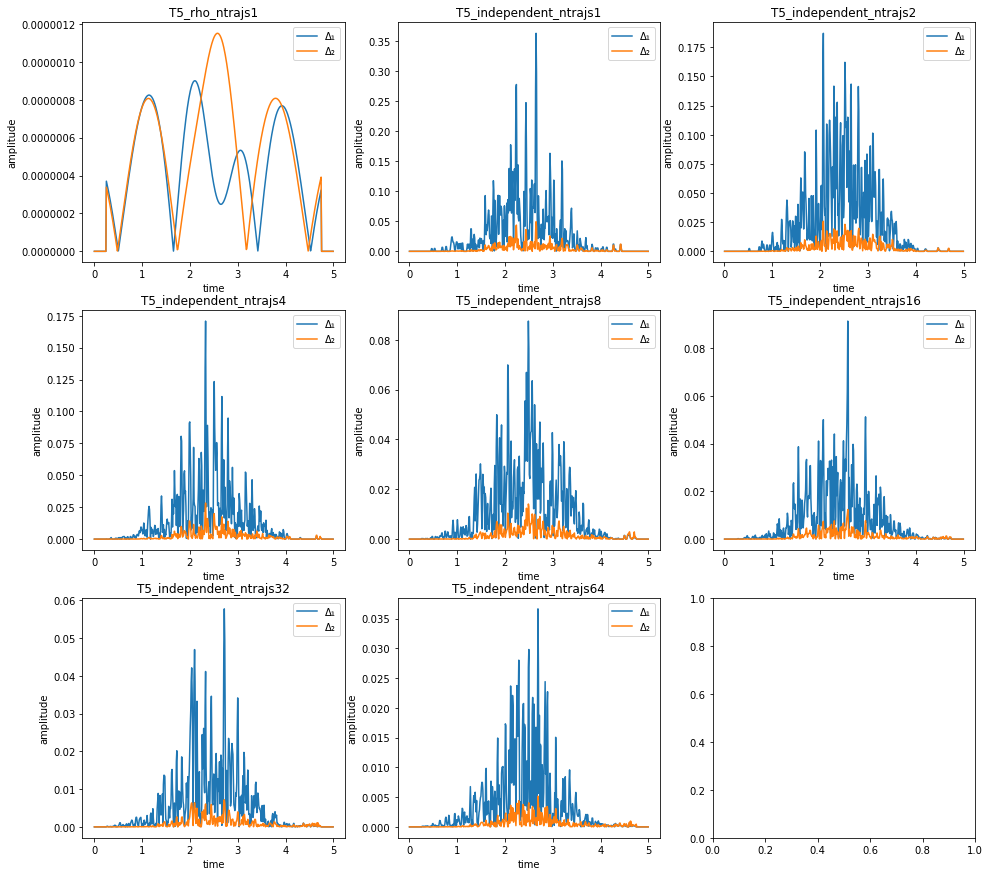

In [16]:
plot_pulse_delta_smoothing(
    [rf_rho, ] + rfs_independent_trajs,
    smooth_pulse_savgol,
    window_length=5, polyorder=3)

## How does convergence compare between density matrix optimization and cross-referenced-trajectory optimization?

In [17]:
rfs_cross_trajs =  sorted(
    glob(join(ROOT, 'T5_cross_ntrajs*')), key=rf_sort_key)

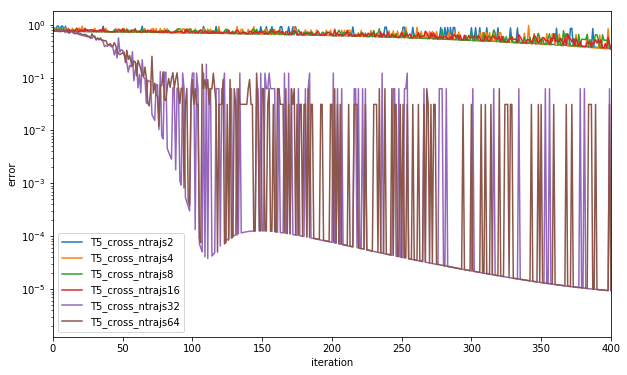

In [18]:
plot_convergence_comparison(
    rfs_cross_trajs, monotonic=False, xlim=(0, 400))

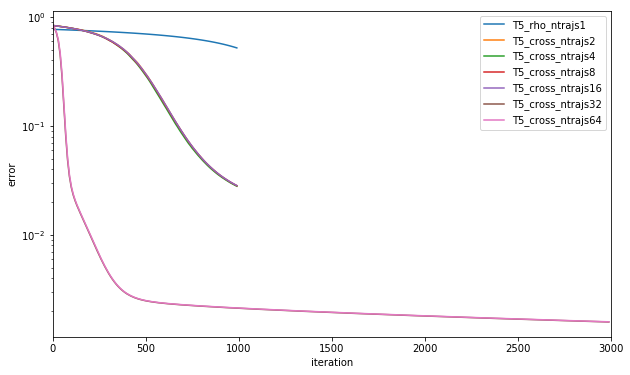

In [19]:
plot_rho_prop_error_comparison(
    [rf_rho, ] + rfs_cross_trajs, xlim=(0, 3000))

## How do the pulses compare between density matrix optimization and cross-referenced-trajectory optimization?

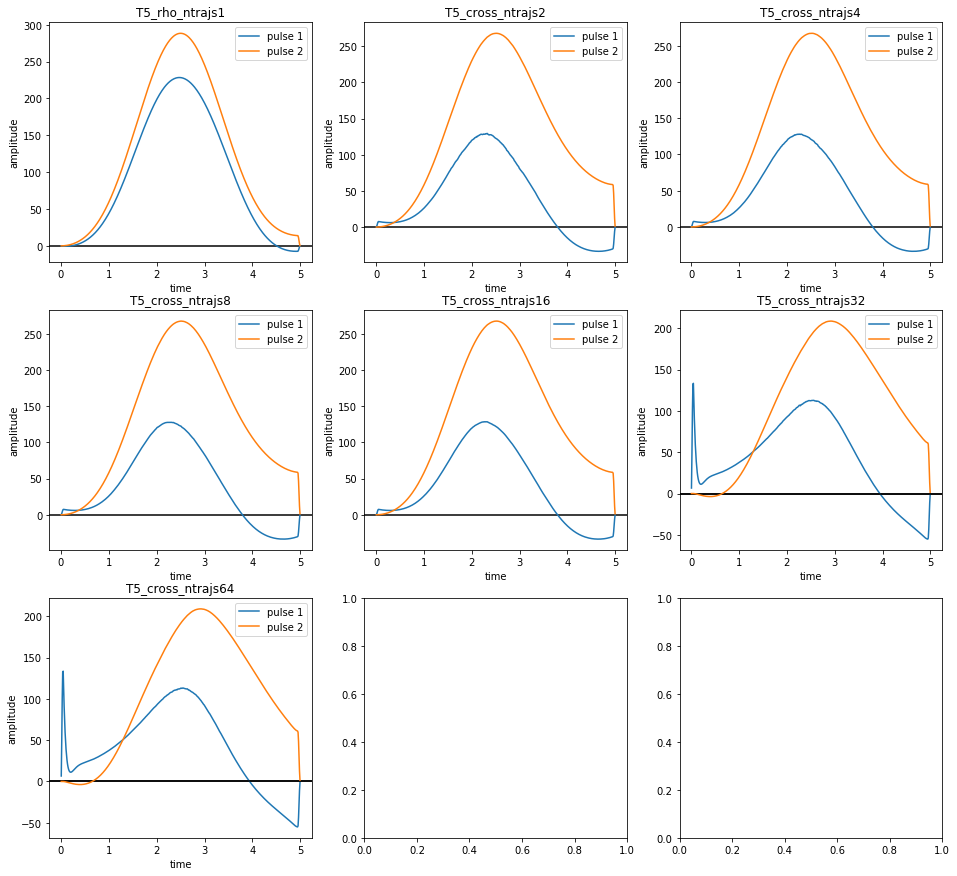

In [20]:
plot_pulse_comparison([rf_rho, ] + rfs_cross_trajs)

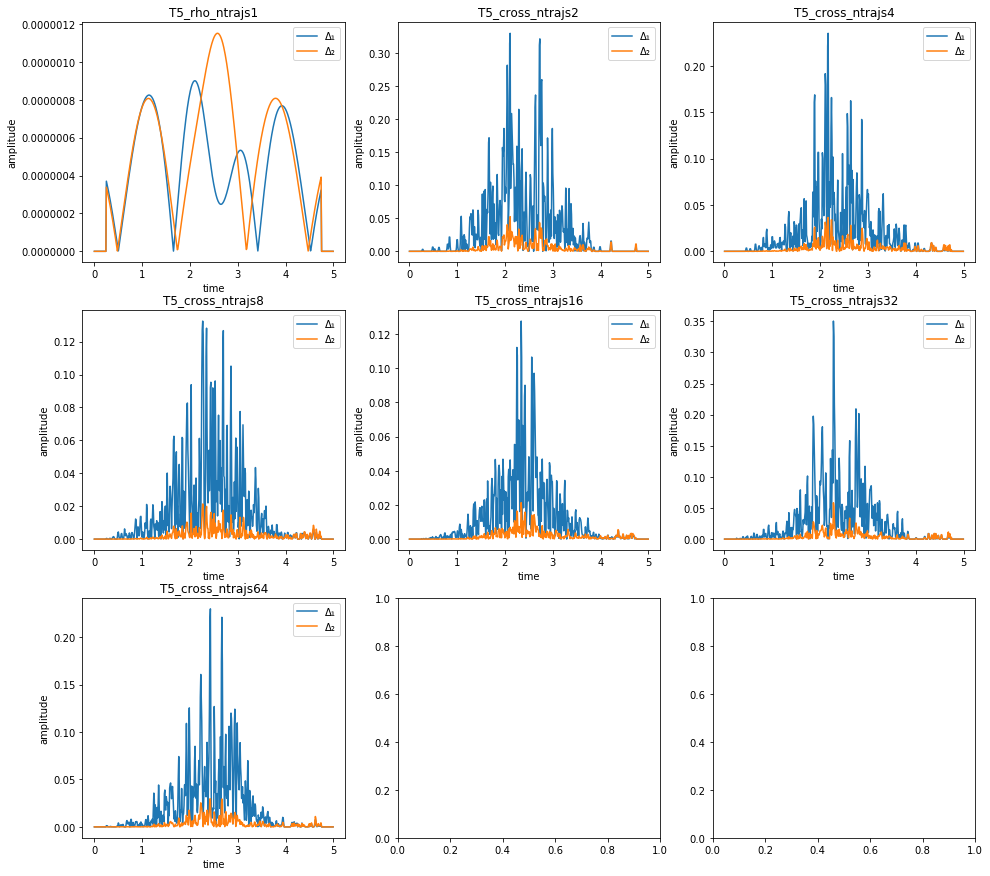

In [21]:
plot_pulse_delta_smoothing(
    [rf_rho, ] + rfs_cross_trajs,
    smooth_pulse_savgol,
    window_length=5, polyorder=3)

## How does the noise table compare?

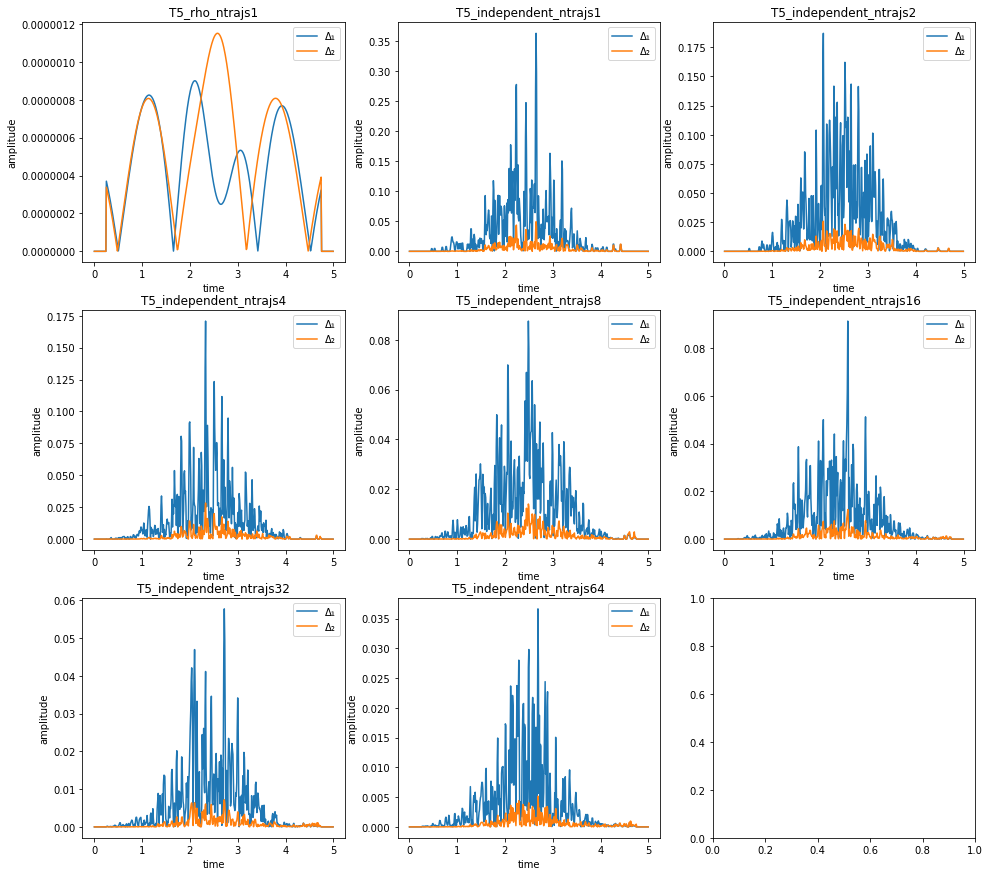

In [22]:
plot_pulse_delta_smoothing(
    [rf_rho, ] + rfs_independent_trajs,
    smooth_pulse_savgol,
    window_length=5, polyorder=3)

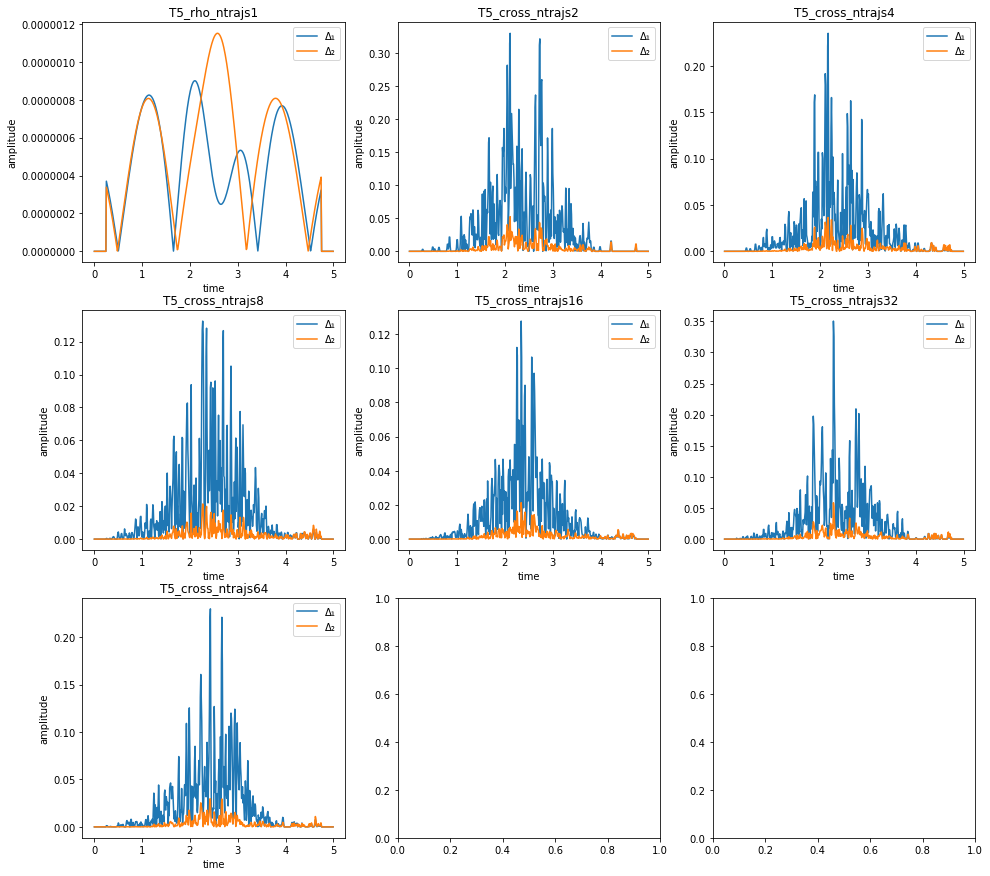

In [23]:
plot_pulse_delta_smoothing(
    [rf_rho, ] + rfs_cross_trajs,
    smooth_pulse_savgol,
    window_length=5, polyorder=3)

In [26]:
noise_table = combine_noise_tables([
    collect_noise_table(
        rfs_independent_trajs, smooth_pulse_savgol,
        window_length=5, polyorder=3),
    collect_noise_table(
        rfs_cross_trajs, smooth_pulse_savgol,
        window_length=5, polyorder=3)],
    ['independent', 'cross'])

In [27]:
noise_table

,ν1 independent,ν2 independent,ν1 cross,ν2 cross
2,0.105939,0.015217,0.172219,0.022740
4,0.066526,0.010174,0.098874,0.016708
8,0.049816,0.007341,0.076474,0.011813
16,0.037590,0.005489,0.058997,0.009270
32,0.026594,0.003938,0.127671,0.019157
64,0.017010,0.002747,0.101172,0.014612


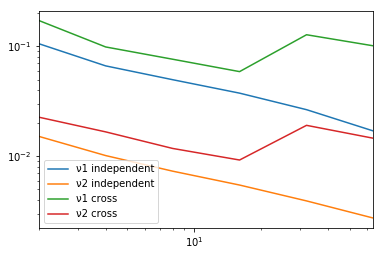

In [28]:
noise_table.plot(logx=True, logy=True)
plt.show()